### Linear regression using PyTorch

Prediction before training: f(5) = 0.000
epoch 1: w = 0.264, loss = 23.33263016
epoch 11: w = 1.467, loss = 0.95386994
epoch 21: w = 1.704, loss = 0.08647973
epoch 31: w = 1.750, loss = 0.05286012
epoch 41: w = 1.760, loss = 0.05155700
epoch 51: w = 1.761, loss = 0.05150649
epoch 61: w = 1.762, loss = 0.05150455
epoch 71: w = 1.762, loss = 0.05150444
epoch 81: w = 1.762, loss = 0.05150448
epoch 91: w = 1.762, loss = 0.05150444


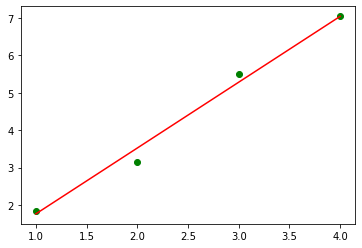

In [20]:
import torch
import matplotlib.pyplot as plt

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
# add some noise
Y += (torch.randn(len(Y))-0.5)*0.5

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')
    
plt.plot(X,Y,'go')
plt.plot(X,y_pred.detach().numpy(),'r-')
plt.show()

In [16]:
print(y_pred)
print(y_pred.detach().numpy())

tensor([1.9880, 3.9759, 5.9639, 7.9518], grad_fn=<MulBackward0>)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.